In [1]:
!pip install scgraph-eval

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 4.7 MB/s eta 0:00:00 MB/s eta 0:00:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 9.8 MB/s eta 0:00:009.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.3 MB/s eta 0:00:0031m12.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 12.5 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import scanpy as sc
from scgraph import scGraph
visual_cfg = {'frameon': False, 'legend_fontsize': 10, 'legend_fontoutline': 2}

In [3]:
# can be download from https://drive.google.com/file/d/1a2UF4V_INGMKayCoMErZG-_kq_KuZmjA/view?usp=drive_link
adata = sc.read_h5ad("../data/fetallung_fibro.h5ad")
adata

AnnData object with n_obs × n_vars = 31343 × 25955
    obs: 'batch', 'dissection', 'chemistry', 'percent_mito', 'n_counts', 'n_genes', 'doublet_scores', 'bh_pval', 'leiden', 'phase', 'S_score', 'G2M_score', 'new_celltype', 'big_cluster', 'broad_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', '_scvi_batch', '_scvi_labels', 'conditions_combined', 'stage'
    var: 'n_cells', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'assay_colors', 'assay_ontology_term_id_colors', 'batch_colors', 'big_cluster_colors', 'broad_celltype_colors', 'cell

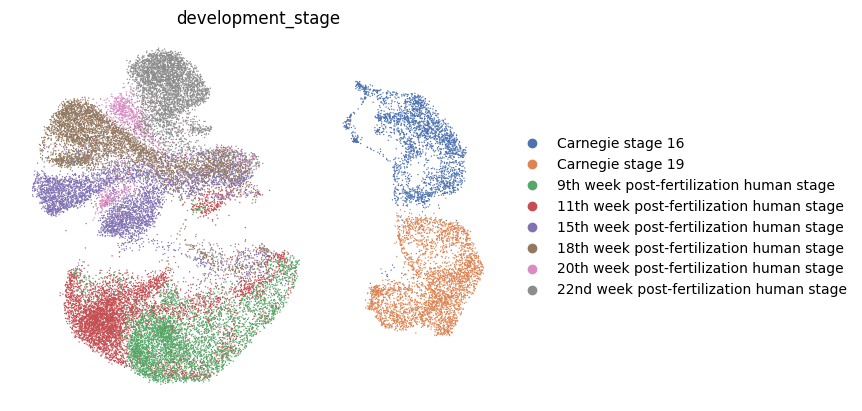

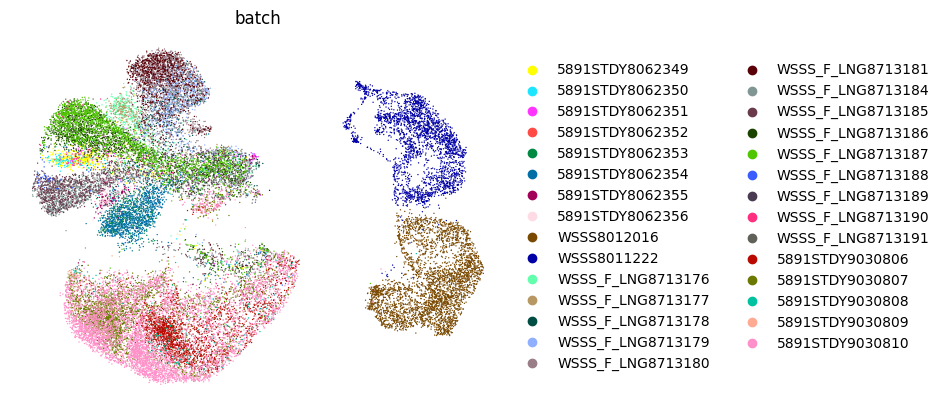

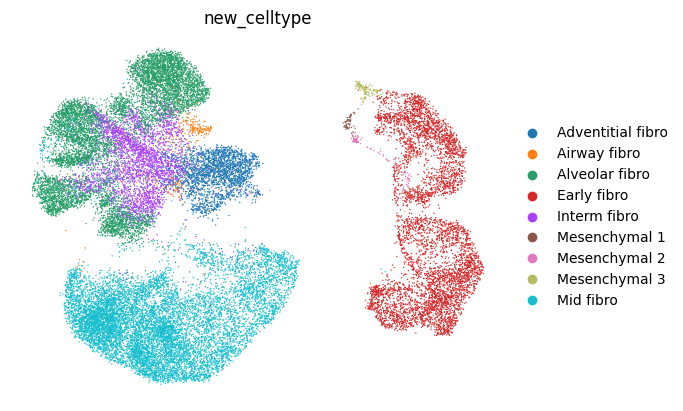

In [4]:
sc.pl.embedding(adata, basis="X_pca_umap", color=["development_stage"], **visual_cfg)
sc.pl.embedding(adata, basis="X_pca_umap", color=["batch"], **visual_cfg)
sc.pl.embedding(adata, basis="X_pca_umap", color=["new_celltype"], **visual_cfg)

In [5]:
# Initialize the graph analyzer
scgraph = scGraph(
    adata_path="../data/fetallung_fibro.h5ad", # Path to AnnData object
    batch_key="batch",                     # Column name for batch information
    label_key="new_celltype",              # Column name for cell type labels
    trim_rate=0.05,                        # Trim rate for robust mean calculation
    thres_batch=100,                       # Minimum number of cells per batch
    thres_celltype=100,                    # Minimum number of cells per cell type
    only_umap=True,                        # Only evaluate 2D embeddings (mostly umaps)
)

# Run the analysis, return a pandas dataframe
results = scgraph.main()

Skipped cell type Mesenchymal 2, due to < 100 cells
Skipped cell type Mesenchymal 1, due to < 100 cells
Processing batches, calcualte centroids and pairwise distances


  0%|          | 0/29 [00:00<?, ?it/s]

Skipped batch 5891STDY8062352, due to < 100 cells
Skipped batch WSSS_F_LNG8713188, due to < 100 cells
Skipped batch WSSS_F_LNG8713189, due to < 100 cells
Skipped batch WSSS_F_LNG8713190, due to < 100 cells
Skipped batch WSSS_F_LNG8713191, due to < 100 cells


In [6]:
results.sort_values(ascending=False, by="Corr-Weighted")

,Rank-PCA,Corr-PCA,Corr-Weighted
X_pca_umap,0.701020,0.714290,0.452014
full_x_umap_original,0.698980,0.687565,0.421446
X_umap,0.661224,0.725793,0.407784
Harmony_umap,0.737755,0.862680,0.396075
X_tsne,0.672449,0.796672,0.372073
X_scANVI_umap,0.630612,0.738594,0.355965
Scanorama_umap,0.610204,0.654913,0.351544
X_scVI_umap,0.617347,0.901525,0.339142
fastMNN_umap,0.601020,0.646795,0.331814
fastMNN_pca_umap,0.639796,0.681002,0.318392
